In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# **Q4**

In [2]:
#َA
c = 2.1
while (True):
  A = np.array([[c,1,0,0],[1,c,1,0],[0,1,c,1],[0,0,1,c]])
  D = np.diag(np.diag(A))
  M_J = np.dot(np.linalg.inv(D),D-A)
  rho = np.max(np.abs(np.linalg.eigvals(M_J)))
  if rho>=1:
    break
  print("if c = "+ str(c)+" :")
  print("M_j = ")
  print(M_J)
  print("rho = " + str(rho))
  print("---------------------------------------------------------")
  c -= 0.0001

Streaming output truncated to the last 5000 lines.
if c = 1.6804999999998245 :
M_j = 
[[ 0.         -0.59506099  0.          0.        ]
 [-0.59506099  0.         -0.59506099  0.        ]
 [ 0.         -0.59506099  0.         -0.59506099]
 [ 0.          0.         -0.59506099  0.        ]]
rho = 0.9628289132698984
---------------------------------------------------------
if c = 1.6803999999998245 :
M_j = 
[[ 0.         -0.59509641  0.          0.        ]
 [-0.59509641  0.         -0.59509641  0.        ]
 [ 0.         -0.59509641  0.         -0.59509641]
 [ 0.          0.         -0.59509641  0.        ]]
rho = 0.9628862108724485
---------------------------------------------------------
if c = 1.6802999999998245 :
M_j = 
[[ 0.         -0.59513182  0.          0.        ]
 [-0.59513182  0.         -0.59513182  0.        ]
 [ 0.         -0.59513182  0.         -0.59513182]
 [ 0.          0.         -0.59513182  0.        ]]
rho = 0.9629435152949255
--------------------------------------

In [3]:
#B
c = 2.1
while (1):
  A = np.array([[c,1,0,0],[1,c,1,0],[0,1,c,1],[0,0,1,c]])
  # lower_tri = L + D
  lower_tri = np.tril(A)
  M_g = np.dot(np.linalg.inv(lower_tri),lower_tri - A)
  rho = np.max(np.abs(np.linalg.eigvals(M_g)))
  if rho>=1:
    break
  print("if c = "+ str(c)+" :")
  print("M_g = ")
  print("M_g = ")
  print(M_g)
  print("rho = " + str(rho))
  print("----------------------------------------------------------")
  c -= 0.0001

Streaming output truncated to the last 5000 lines.
 [ 0.          0.35702339 -0.59751434  0.        ]
 [ 0.         -0.21332659  0.35702339 -0.59751434]
 [ 0.          0.1274657  -0.21332659  0.35702339]]
rho = 0.9346993617273135
----------------------------------------------------------
if c = 1.6734999999998252 :
M_g = 
M_g = 
[[ 0.         -0.59755004  0.          0.        ]
 [ 0.          0.35706606 -0.59755004  0.        ]
 [ 0.         -0.21336484  0.35706606 -0.59755004]
 [ 0.          0.12749617 -0.21336484  0.35706606]]
rho = 0.9348110709939051
----------------------------------------------------------
if c = 1.6733999999998252 :
M_g = 
M_g = 
[[ 0.         -0.59758575  0.          0.        ]
 [ 0.          0.35710873 -0.59758575  0.        ]
 [ 0.         -0.21340309  0.35710873 -0.59758575]
 [ 0.          0.12752665 -0.21340309  0.35710873]]
rho = 0.9349228002878559
----------------------------------------------------------
if c = 1.6732999999998253 :
M_g = 
M_g = 
[[ 0.  

<div dir=rtl>
#C

در زمانی که هر دو الگوریتم همگرا می شوند ﺭﻭﺵ ﮔﺎﻭﺱ ﺳﺎﻳﺩﻝ ﺍﺯ ژﺍﮐﻭﺑﯽ ﺳﺭﻋﺕ ﻫﻣﮕﺭﺍﻳﯽ ﺑﻳﺷﺗﺭی دارد. همچنین هر چه مقدار C بیشتر شود سرعت همگرایی بیشتر میشود.

# **Q7**

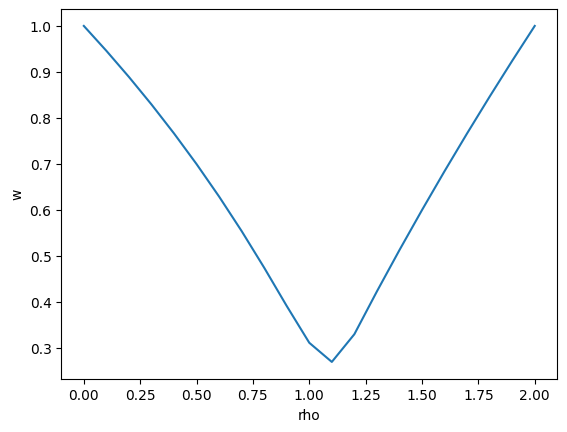

In [4]:
#A
A = np.array([[3,1,0,-1],[1,3,1,0],[0,1,3,1],[-1,0,1,3]])
b = np.array([1,2,0,-1])
D = np.diag(np.diag(A))
L = np.tril(A) - D
U = np.triu(A) - D
W = [i/10 for i in range(21)]
eigs = []
for w in W:
  M_sor = np.dot(-np.linalg.inv(D+w*L),(w-1)*D+w*U)
  rho = np.max(np.abs(np.linalg.eigvals(M_sor)))
  eigs.append(rho)
plt.plot(W,eigs)
plt.xlabel("rho")
plt.ylabel("w")
plt.show()

In [5]:
#B
A = np.array([[3, 1, 0, -1], [1, 3, 1, 0], [0, 1, 3, 1], [-1, 0, 1, 3]])
b = np.array([1, 2, 0, -1])

start_time = time.time()
w = 1.1
X = np.zeros_like(b)

L = np.tril(A, k=-1)
U = np.triu(A, k=1)
D = np.diag(np.diag(A))

for _ in range(100):
    M_sor = np.dot(np.linalg.inv(D + w*L), ((1 - w) * D - w*U))
    c_sor = w * np.dot(np.linalg.inv(D + w*L), b)
    X = np.dot(X, M_sor) + c_sor

end_time  = time.time()

print(X)
print("time :" + str(end_time - start_time))


[ 0.35305344  0.48470388 -0.41215926  0.05109524]
time :0.017442703247070312


In [7]:
#C
start_time = time.time()
X = np.linalg.solve(A,b)
end_time  = time.time()
print(X)
print("time :" + str(end_time - start_time))

[-7.40148683e-17  7.14285714e-01 -1.42857143e-01 -2.85714286e-01]
time :0.0015752315521240234


# **Q8**

In [8]:
#A

import numpy as np
import time

A = np.array([[5.0 if i == j else -1.0 if abs(i-j) == 1 else 0.0 for j in range(1000)] for i in range(1000)], dtype=float)
A[0][-1] = 1.0
A[-1][0] = 1.0
b = np.ones(1000, dtype=float)

start_time = time.time()

n = len(b)
for i in range(n):
    for j in range(i+1, n):
        factor = A[j][i] / A[i][i]
        A[j] -= factor * A[i]
        b[j] -= factor * b[i]


x = np.zeros(n, dtype=float)
for i in range(n-1, -1, -1):
    x[i] = (b[i] - np.dot(A[i][i+1:], x[i+1:])) / A[i][i]


end_time = time.time()
elapsed_time = end_time - start_time

print("Solution:")
print(x)
print("Time taken to solve: {:.6f} seconds".format(elapsed_time))


Solution:
[0.21821789 0.30930734 0.32831882 0.33228674 0.3331149  0.33328774
 0.33332382 0.33333135 0.33333292 0.33333325 0.33333332 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333


<div dir=rtl>
#B

چون شعاع طیفی از 1 کمتر است پس همگرایند.

In [10]:
#B

D = np.diag(np.diag(A))
M_J = np.dot(np.linalg.inv(D),D-A)
lower_tri = np.tril(A)
M_g = np.dot(np.linalg.inv(lower_tri),lower_tri - A)
rho_J = np.max(np.abs(np.linalg.eigvals(M_J)))
rho_g = np.max(np.abs(np.linalg.eigvals(M_g)))
print("rho_J = "+str(rho_J))
print("rho_g = "+str(rho_g))


A = np.array([[5.0 if i == j else -1.0 if abs(i-j) == 1 else 0.0 for j in range(1000)] for i in range(1000)], dtype=float)
A[0][-1] = 1.0
A[-1][0] = 1.0
b = np.ones(1000, dtype=float)

X = np.zeros(1000)

start = time.time()

while np.linalg.norm(b - np.dot(A, X)) / np.linalg.norm(b) > 1e-14:
    X = np.linalg.solve(A, b)

end = time.time()

print("Time taken: {:.6f} seconds".format(end - start))
print("Solution:")
print(X)


rho_J = 0.3999980260807443
rho_g = 0.24973969840952126
Time taken: 0.032973 seconds
Solution:
[0.21821789 0.30930734 0.32831882 0.33228674 0.3331149  0.33328774
 0.33332382 0.33333135 0.33333292 0.33333325 0.33333332 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0